

Mean = %4.3f
 0.0039961257177634196
Std. deviation = %4.3f
 0.041031528620959316
Skewness = %4.3f
 -0.27972693402031196
Excess kurtosis = %4.3f
 5.338455570833892




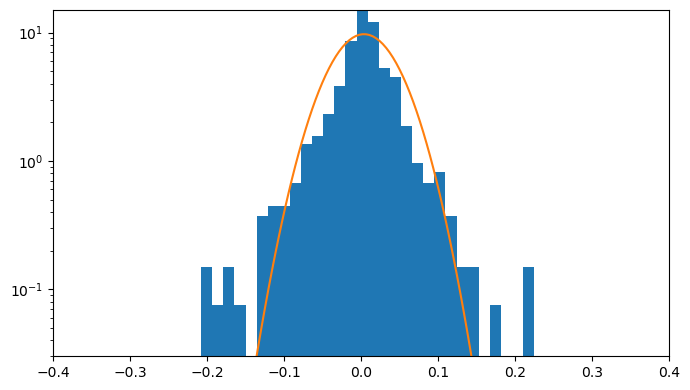

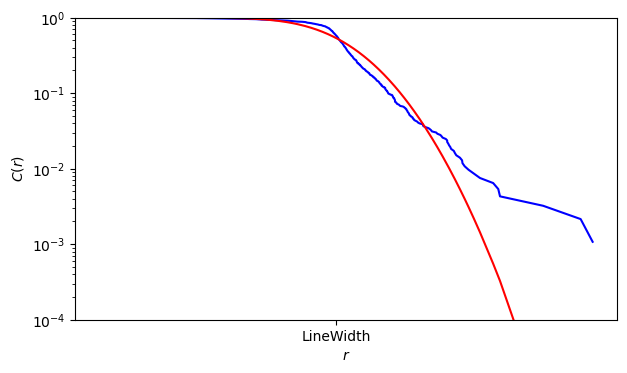

In [120]:
#!/usr/bin/python3.7
#Case_Study1.py
#Parth Parakh
#purpose: Maximum Likelihood on Crypocurrency Data
#---------------------------------------------------------------------
#import modules
import numpy as np
import csv
from scipy import special
import matplotlib.pyplot as plt
#----------------------------------------------------------------------
#helper function
def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d
        
if __name__ == '__main__':
    file = readFile("cryptocurrency_prices.txt")
    data = (file)
    b = data[0]
    
    r = np.zeros((len(b)-1,1))
    for i in range(0,len(b)-1):
        den = float(b[i])
        num = float(b[i+1]);
        r[i] = np.log(num/den);
        
    #Aggregation of returns   

    tau = 7;            # Number of days for aggregation of returns 
    flag = 0;           #Flag variable (set to 1 to aggregate returns over longer time scales)
    if flag == 1:
        aux = []; 
        for t in range(0,len(r)-1-tau,tau):
            s = sum(r[i] for i in range(t+1,t+tau))
            aux = np.concatenate((aux,s),axis=0);   
        r = aux;
    
    #four moments
    
    N = len(r);                      # Number of log-returns
    m = np.sum(r)/N;                 #Compute mean and store value in variable
    print('\n')
    print('Mean = %4.3f\n',m)
    s = np.sqrt(np.sum((r-m)**2)/N); #Compute std. deviation and store value in variable
    print('Std. deviation = %4.3f\n',s)
    print('Skewness = %4.3f\n',np.sum((r-m)**3)/(N*(s**3)))
    print('Excess kurtosis = %4.3f\n',np.sum((r-m)**4)/(N*(s**4))-3)
    print('\n')
    
    x = np.linspace(min(r),max(r),100); # Point grid between min and max return
    g = np.exp(-(x-m)**2/(2*(s**2)))/np.sqrt(2*np.pi*(s**2)); # Gaussian PDF values computed on point grid

    NB = 30; # Number of bins for histogram of returns
    

    plot1 = plt.figure(1,figsize=(7,4), dpi=100)
    plt.hist(r,bins =30,density=True,stacked=True)
    plt.plot(x,g)
    plt.yscale('log')
    plt.xlim(-0.4,0.4)
    plt.ylim(0.03,15)
    plt.tight_layout()

    x = np.sort(r,axis=None); # Returns sorted in ascending order
    y = np.arange(1,len(r)+1,1); 
    y = 1 - y/(len(r)+1); # Calculating CCDF as rank-frequency plot
    c = 0.5*(1 - special.erf((x-m)/(s*np.sqrt(2)))); # Gaussian CCDF

    plot2 = plt.figure(2,figsize=(7,4), dpi=100)
    plt.plot(x,y,'b','LineWidth',2)
    plt.plot(x,c,'r','LineWidth',2)
    plt.yscale('log')
    plt.ylim([1e-4,1])
    plt.xlabel('$r$')
    plt.ylabel('$C(r)$')